# Importando a base de dados do ENEM para análise

In [2]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Leitura da base
dados_enem = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep = ";", encoding = "ISO-8859-1")

# Funções auxiliares

In [5]:
#Forma da base
dados_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


# Filtrando a base
Aqui, faremos um filtro apenas com algumas informações que são mais relevantes e específicas para cada aluno, como condições especiais, e as informações básicas como sexo, idade e residência do mesmo. Tem também o intuito de diminuir o processamento de dados que não serão necessariamente mostrados todo o tempo.

In [6]:
colunas_filtro = [
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
       'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL']

# Observando a idade dos inscritos
A primeira análise feita foi acerca da idade dos inscritos do ENEM 2019 afim de verificar se há uma tendência com os anos anteriores.

In [7]:
dados_enem_filtrados = dados_enem.filter(items=colunas_filtro)

In [8]:
#Recolhe apenas a coluna de idade dos dados filtrados
coluna_idade = dados_enem_filtrados['NU_IDADE']

Mostra a quantidade de inscritos de cada idade, como podemos ver normalmente, há uma quantidade maior de jovens entre 16 e 20 anos, visto que estão saindo do ensino médio, ou ainda estão no mesmo mas entram como treineiro. E como curiosidade podemos notar que há um candidato de 94 anos como o mais velho em 2019, assim como crianças de 1 à 10 também foram inscritas.

Aqui utilizei o método <b>value_counts</b> que retorna a contagem de vezes que cada valor aparece em determinada coluna.

In [9]:
pd.options.display.max_rows = len(coluna_idade.value_counts())
coluna_idade.value_counts()

18    864186
17    847303
19    577161
20    409385
16    316437
21    290311
22    233036
23    187681
24    156262
25    128042
26    106880
27     89618
15     78563
28     78008
29     66783
30     62491
31     56633
32     50252
33     46774
34     42821
35     38584
36     36476
37     35197
38     32656
39     28629
40     25991
41     22675
42     20411
43     18551
44     16508
45     15183
46     13509
47     12565
48     11107
49      9950
50      8799
51      7698
52      6981
53      6200
54      5527
14      5267
55      4781
56      4058
57      3624
58      2774
59      2386
60      1901
61      1602
62      1384
63      1075
64       849
65       713
66       531
67       495
68       366
69       306
13       266
70       221
71       174
72       127
73       101
74        78
75        58
12        46
76        41
77        34
78        31
8         25
79        20
7         15
81        14
80        11
6          9
11         9
82         8
83         6
10         6

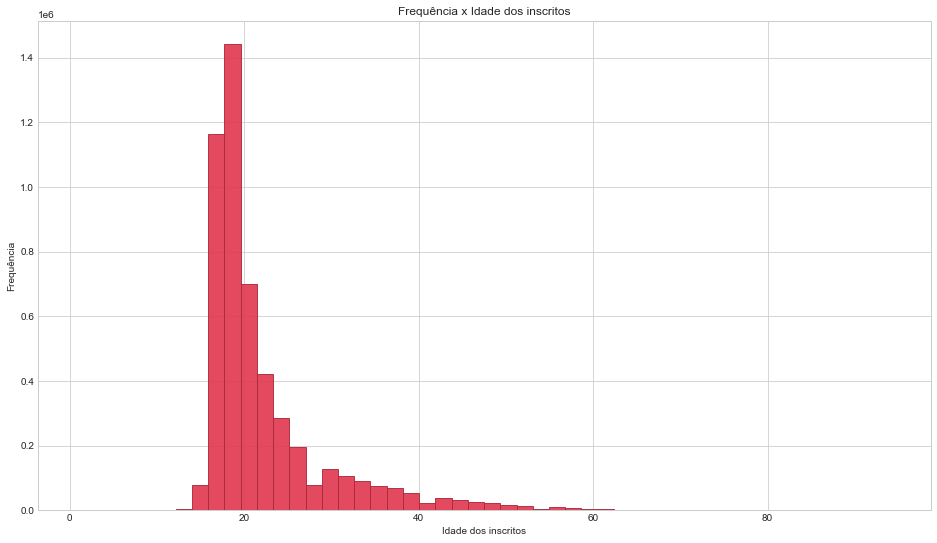

In [23]:
#Plot do histograma de idade dos inscritos
plt.style.use('seaborn-whitegrid')
plt.hist(coluna_idade, bins= 50, facecolor = '#E0364D', edgecolor='#AD2A3B', alpha = 0.9, align = 'mid')
plt.title("Frequência x Idade dos inscritos")
plt.ylabel("Frequência")
plt.xlabel("Idade dos inscritos")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

# Quantidade de inscritos por estado
Aqui podemos ver a contagem por estado, os 5 estados com mais inscritos se mantiveram iguais aos de 2018, sendo eles, São Paulo, Minas Gerais, Bahia, Rio de Janeiro e Ceará.

In [20]:
coluna_estado = dados_enem_filtrados['SG_UF_RESIDENCIA']
coluna_estado.value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

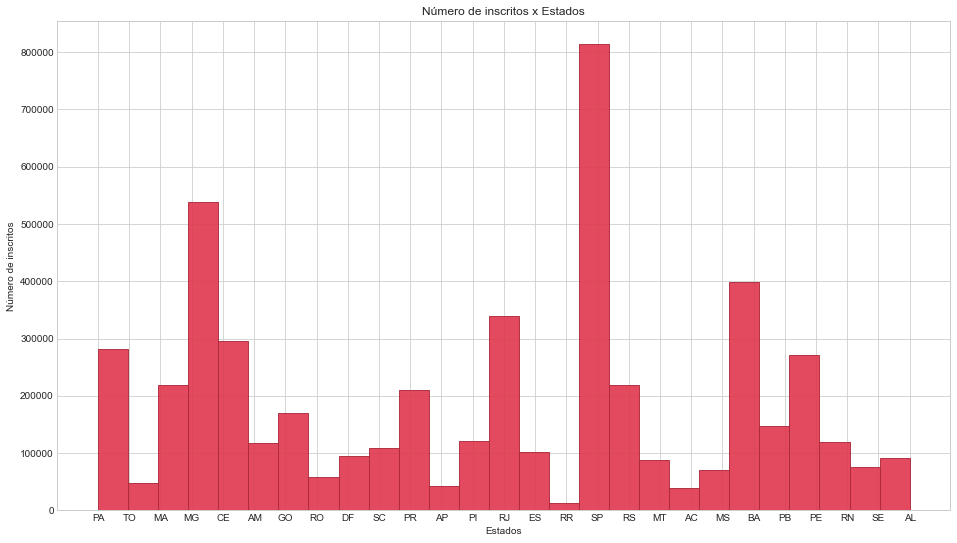

In [24]:
#Plot do histograma de idade dos inscritos
plt.style.use('seaborn-whitegrid')
plt.hist(coluna_estado, bins= 27, facecolor = '#E0364D', edgecolor='#AD2A3B', alpha = 0.9, align = 'mid')
plt.title("Número de inscritos x Estados")
plt.ylabel("Número de inscritos")
plt.xlabel("Estados")
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

Análise da porcentagem de pessoas com autismo no ENEM 2019 utilizando <i>list comprehension</i>

In [25]:
coluna_autismo = dados_enem_filtrados['IN_AUTISMO']
quant_autismo = coluna_autismo.value_counts()

porcentagem_autismo = [100*x/quant_autismo.sum() for x in quant_autismo]
print("Porcentagem de pessoas sem autismo: %.2f%%" %porcentagem_autismo[0])
print("porcentagem de autistas: %.2f%%" %porcentagem_autismo[1])

Porcentagem de pessoas sem autismo: 99.98%
porcentagem de autistas: 0.02%


# Análise utilizando questões socioeconômicas gerais
A primeira análise irá utilizar os dados das notas de redação e matemática e as questões 1 e 2 do questionário de inscrição.

Q001 - Até que série seu pai, ou o homem responsável por você, estudou ? <br>
Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou ?

In [28]:
colunas_socio = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']
dados_enem_filtrados = dados_enem.filter(items=colunas_socio)
#Como haviam dados com campos NaN, que significa Not a Number, utilizamos a função dropna() para filtrar esses dados da amostra,
#esses dados podem significar que o inscrito não compareceu no dia da prova, sendo assim não há um número para inserir nos campos de nota.
dados_enem_filtrados = dados_enem_filtrados.dropna()
dados_enem_filtrados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,369.1,780.0,D,E
1,190001004628,416.5,600.0,D,E
2,190001004629,571.5,640.0,H,E
5,190001004632,605.3,580.0,C,C
6,190001004633,581.5,360.0,B,B


In [29]:
#Dicionário para melhor visualização do resultado, essas informações foram retiradas do dicionário de dados
q001_quest = {
    'A':'Nunca Estudou',
    'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':'Completou a Pós-graduação.',
    'H':'Não Sei'}

In [30]:
'''
Adiciona uma nova coluna a nossa amostra, para cada resposta encontrada na coluna Q001, será adicionada a nova coluna o texto
de resposta correspondente ao dicionário criado anteriormente. Exemplo, caso o primeiro aluno tenha respondido 'A', a nova
coluna receberá 'Não Estudou' O mesmo processo será feito para Q002 utilizando o mesmo questionário, já que as alternativas são
iguais.
'''
dados_enem_filtrados['Res_Q001'] = [q001_quest[resp] for resp in dados_enem_filtrados.Q001] 
dados_enem_filtrados['Res_Q002'] = [q001_quest[resp] for resp in dados_enem_filtrados.Q002] 
dados_enem_filtrados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Res_Q001,Res_Q002
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,571.5,640.0,H,E,Não Sei,"Completou o Ensino Médio, mas não completou a ..."
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,581.5,360.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...


Distribuição dos inscritos do ENEM por escolaridade do pai. Como no ENEM 2018, a maioria dos alunos tiveram pais que terminaram o ensino médio porém não completaram a faculdade.

Aqui Serão introduzidas as funções <b>groupby</b>, <b>count</b> e <b>sort_values</b>.<br>
A função groupby, como diz o nome, agrupa um grande conjunto de dados para aplicar operações nos mesmos. Aqui foram agrupados pelas respostas das questões 1 e 2. Em seguida o método count será aplicado para fazer a contagem de quantas respostas temos em cada grupo. Por fim o método sort_values para ordenar os resultados, aqui feito de maneira decrescente.

In [33]:
dados_enem_filtrados.filter(items=['Res_Q001','NU_INSCRICAO']).groupby('Res_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
Res_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental.,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",433193
"Completou a Faculdade, mas não completou a Pós-graduação.",308319
Não Sei,306177
Completou a Pós-graduação.,193529
Nunca Estudou,186186


Ambas as distribuições ficaram muito parecidas, exceto por um detalhe, o número de inscritos que não sabem o nível de escolaridade dos pais é mais que o triplo dos que não sabem a escolaridade da mãe, o que pode ser um indício de que muitas famílias são gerenciadas apenas pelas mães dos inscritos e que o abandono parental por parte de pai.

In [32]:
dados_enem_filtrados.filter(items=['Res_Q002','NU_INSCRICAO']).groupby('Res_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
Res_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental.,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",471827
"Completou a Faculdade, mas não completou a Pós-graduação.",416291
Completou a Pós-graduação.,333159
Nunca Estudou,121022
Não Sei,97636


# Obtendo as médias de nota de matemática e redação, pela escolaridade dos pais
Como pudemos notar, ambas as médias de matemática e redação, estão bem relacionadas a escolaridade do pai e da mãe, pode-se analisar que há uma tendência de que a nota seja maior para os inscritos cujo os pais tenham uma escolaridade maior, a média parece ter uma relação forte com a formação dos pais, visto que a média desce conforme a escolaridade desce, sendo a maior média obtida pelos candidatos cujo pai ou mãe possui uma pós graduação e as menores pelos que os pais nunca estudaram. Essa tendência também pode ser observada se analisarmos o ENEM de 2018.

Aqui será utilizada a função <b>mean</b> que basicamente tira uma média de um determinado grupo de dados. Aqui se faz necessária para calcular as notas médias de cada grupo de respostas dos inscritos para as questões 1 e 2.

In [43]:
#Escolaridade do Pai - Médias de Matemática
dados_enem_filtrados.filter(items=['Res_Q001','NU_NOTA_MT']).groupby('Res_Q001')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Res_Q001,
Completou a Pós-graduação.,624.118011
"Completou a Faculdade, mas não completou a Pós-graduação.",600.305733
"Completou o Ensino Médio, mas não completou a Faculdade.",538.924218
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.746985
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",505.398424
Não Sei,495.478053
Não completou a 4ª série/5º ano do Ensino Fundamental.,486.456585
Nunca Estudou,466.098351


In [44]:
#Escolaridade da Mãe - Médias de Matemática
dados_enem_filtrados.filter(items=['Res_Q002','NU_NOTA_MT']).groupby('Res_Q002')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Res_Q002,
Completou a Pós-graduação.,598.916796
"Completou a Faculdade, mas não completou a Pós-graduação.",583.324021
"Completou o Ensino Médio, mas não completou a Faculdade.",528.317356
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",505.045830
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",496.050296
Não Sei,484.997643
Não completou a 4ª série/5º ano do Ensino Fundamental.,480.071887
Nunca Estudou,459.859393


In [45]:
#Escolaridade do Pai - Médias de Redação
dados_enem_filtrados.filter(items=['Res_Q001','NU_NOTA_REDACAO']).groupby('Res_Q001')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Res_Q001,
Completou a Pós-graduação.,700.475174
"Completou a Faculdade, mas não completou a Pós-graduação.",673.474421
"Completou o Ensino Médio, mas não completou a Faculdade.",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",558.370329
Não Sei,537.062092
Não completou a 4ª série/5º ano do Ensino Fundamental.,532.604420
Nunca Estudou,496.082520


In [48]:
#Escolaridade da Mãe - Médias de Redação
dados_enem_filtrados.filter(items=['Res_Q002','NU_NOTA_REDACAO'])\
.groupby('Res_Q002')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Res_Q002,
Completou a Pós-graduação.,676.237352
"Completou a Faculdade, mas não completou a Pós-graduação.",655.624887
"Completou o Ensino Médio, mas não completou a Faculdade.",591.134491
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",558.917193
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",543.685715
Não completou a 4ª série/5º ano do Ensino Fundamental.,522.132595
Não Sei,505.266910
Nunca Estudou,482.743138


# Obtendo as médias de nota de matemática e redação, pela disponibilidade de internet e computador em casa
Q024 - Na sua residência tem computador ? <br>
Q025 - Na sua residência tem acesso à Internet ?

Como esperado, também podemos notar uma tendência na questão da quantidade de computadores em relação às médias de redação e matemática, na média, quanto mais computadores a pessoa possuir, maior é a média em ambas as provas, também podemos observar que há uma distância maior das médias de quem tem apenas um computador, e quem possui 2, o que pode indicar que muitas vezes por possuir apenas 1 computador em casa, o mesmo não necessariamente fica disponível para utilização do candidato, podendo ter que dividir com outras pessoas na casa, como irmãos que também estudam e pais que trabalham. A grande variação de média entre quem possui 1 computador e quem não possui nenhum pode ser simplesmente explicada pela falta de acesso fácil aos materiais de estudo na internet das pessoas que não possuem computadores em casa, fazendo o aluno ter que estudar por outros meios, enquanto o estudante que possui pelo menos 1 computador em casa, ainda que possa ser dificultado, tem acesso a muita informação, como cursos online, livros em pdf, mídias como youtube e simulados online, para se preparar o mínimo para a prova. Quanto ao acesso à internet, essa questão agrega mais candidatos por alternativa, esses resultados mostram que independente da média geral, o candidato pode ir mal na prova de qualquer jeito, por isso as médias são de certa forma, mais baixas que o normal. Entretanto, é possível notar uma clara diferença entra os inscritos que possuem internet e os que não possuem, o que reflete um resultado semelhante ao de ter ou não computador em casa, a questão do acesso à materiais de estudo online reflete no seu desempenho em ambas as provas.

In [51]:
colunas_internet = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q024','Q025']
dados_enem_filtrados = dados_enem.filter(items=colunas_internet)
dados_enem_filtrados = dados_enem_filtrados.dropna()
#Dicionários para melhor visualização do resultado, essas informações foram retiradas do dicionário de dados
q024_quest = {
    'A':'Não',
    'B':'Sim, um.',
    'C':'Sim, dois.',
    'D':'Sim, três.',
    'E':'Sim, quatro ou mais.'}

q025_quest = {
    'A':'Não',
    'B':'Sim'
}

In [53]:
dados_enem_filtrados['Res_Q024'] = [q024_quest[resp] for resp in dados_enem_filtrados.Q024] 
dados_enem_filtrados['Res_Q025'] = [q025_quest[resp] for resp in dados_enem_filtrados.Q025] 
dados_enem_filtrados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q024,Q025,Res_Q024,Res_Q025
0,190001004627,369.1,780.0,B,A,"Sim, um.",Não
1,190001004628,416.5,600.0,A,A,Não,Não
2,190001004629,571.5,640.0,C,B,"Sim, dois.",Sim
5,190001004632,605.3,580.0,A,A,Não,Não
6,190001004633,581.5,360.0,A,B,Não,Sim


In [54]:
#Quantidade de inscritos que possuem ou não internet em casa
dados_enem_filtrados.filter(items=['NU_INSCRICAO','Res_Q025']).groupby('Res_Q025').count()

,NU_INSCRICAO
Res_Q025,
Não,781976
Sim,2920031


In [55]:
#Quantidade de pessoas que possuem determinada quantidade de computadores em casa
dados_enem_filtrados.filter(items=['NU_INSCRICAO','Res_Q024']).groupby('Res_Q024')\
.count().sort_values(by = 'NU_INSCRICAO' ,ascending = False)

,NU_INSCRICAO
Res_Q024,
"Sim, um.",1636786
Não,1622567
"Sim, dois.",308610
"Sim, três.",94683
"Sim, quatro ou mais.",39361


In [57]:
#Médias de Matemática - Por quantidade de computadores em casa
dados_enem_filtrados.filter(items=['Res_Q024','NU_NOTA_MT']).groupby('Res_Q024')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Res_Q024,
"Sim, quatro ou mais.",661.429141
"Sim, três.",636.278173
"Sim, dois.",601.787963
"Sim, um.",537.948446
Não,483.389214


In [58]:
#Médias de Matemática - Por acesso à internet
dados_enem_filtrados.filter(items=['Res_Q025','NU_NOTA_MT']).groupby('Res_Q025')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Res_Q025,
Sim,536.167956
Não,474.704902


In [59]:
#Médias de Redação - Por quantidade de computadores em casa
dados_enem_filtrados.filter(items=['Res_Q024','NU_NOTA_REDACAO']).groupby('Res_Q024')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Res_Q024,
"Sim, quatro ou mais.",715.978253
"Sim, três.",701.874888
"Sim, dois.",669.887949
"Sim, um.",601.958020
Não,529.816384


In [60]:
#Médias de Redação - Por acesso à internet
dados_enem_filtrados.filter(items=['Res_Q025','NU_NOTA_REDACAO']).groupby('Res_Q025')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
Res_Q025,
Sim,597.012908
Não,515.379244
